# Chapter 3 Statistical Experiments and Significance Testing
### Imported libraries

In [37]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import random

### Boxplot of session times for web pages A and B

In [3]:
session_times = pd.read_csv('web_page_data.csv')
session_times.shape

(36, 2)

Text(0.5, 0.98, '')

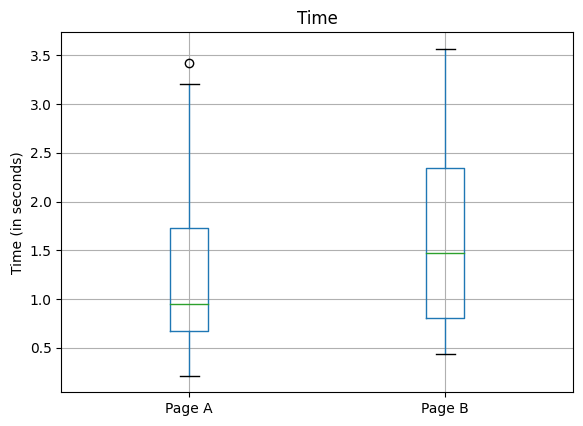

In [4]:
ax = session_times.boxplot(by='Page', column='Time')
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')

### Mean of time

In [5]:
mean_a = session_times[session_times.Page == 'Page A'].Time.mean()
mean_b = session_times[session_times.Page == 'Page B'].Time.mean()
mean_b - mean_a

0.3566666666666669

### Permutation Test

In [12]:
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[list(idx_B)].mean() - x.loc[list(idx_A)].mean()

In [13]:
nA = session_times[session_times.Page == 'Page A'].shape[0]
nB = session_times[session_times.Page == 'Page B'].shape[0]
print(perm_fun(session_times.Time, nA, nB))

0.2995238095238095


Text(0, 0.5, 'Frequency')

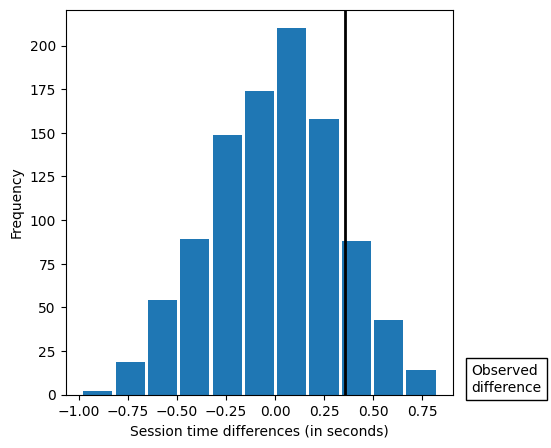

In [28]:
perm_diffs = [perm_fun(session_times.Time, nA, nB) for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x = mean_b - mean_a, color='black', lw=2)
ax.text(1, 2, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Session time differences (in seconds)')
ax.set_ylabel('Frequency')

In [29]:
np.mean(perm_diffs > mean_b - mean_a)

0.121

### Statistical Significance

Observed difference: 0.0368%


Text(0, 0.5, 'Frequency')

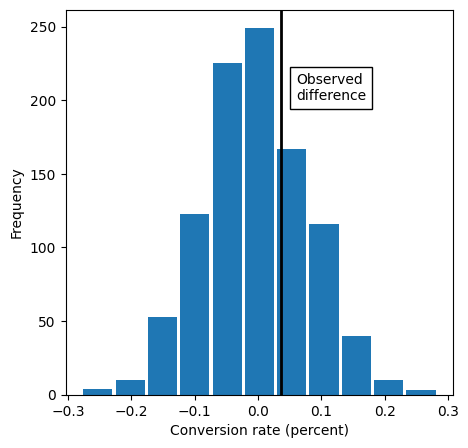

In [35]:
obs_pct_diff = 100*(200/23739 - 182/22588)
print(f'Observed difference: {obs_pct_diff:.4f}%')
conversion = [0]*45945
conversion.extend([1]*382)
conversion = pd.Series(conversion)

perm_diffs = [100 * perm_fun(conversion, 23739, 22588) for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5,5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x=obs_pct_diff, color='black', lw=2)
ax.text(0.06,200, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Conversion rate (percent)')
ax.set_ylabel('Frequency')

### p-Value

In [36]:
np.mean([diff > obs_pct_diff for diff in perm_diffs])

0.31

In [38]:
survivors = np.array([[200, 23739 - 200], [182, 22588 - 182]])
ch12, p_value, df, _ = stats.chi2_contingency(survivors)

In [39]:
print(f'p-value for single sided test: {p_value / 2:.4f}')

p-value for single sided test: 0.3498


### t-Tests

In [40]:
res = stats.ttest_ind(session_times[session_times.Page == 'Page A'].Time,
                      session_times[session_times.Page == 'Page B'].Time,
                      equal_var=False)
print(f'p-value for single sided test: {res.pvalue / 2:.4f}')

p-value for single sided test: 0.1408
